# Projeto de dados do mercado financeiro

Neste projeto de dados, nos concentraremos na análise de dados exploratórios dos preços das ações. Esste projeto apenas pretende praticar habilidades de visualização e pandas.
____
Vamos nos concentrar nas ações dos banco e ver como eles performaram durante a [crise financeira](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) até o início de 2016.

## Obter dados

Nesta seção, aprenderemos a usar pandas para ler diretamente os dados das finanças do Google usando pandas!

Primeiro, precisamos começar com as importações adequadas, que já apresentamos para você aqui.

* Nota: [Você precisará instalar pandas-datareader para que isso funcione!](Https://github.com/pydata/pandas-datareader) O datareader Pandas permite que você [leia informações das ações diretamente da internet](http : //pandas.pydata.org/pandas-docs/stable/remote_data.html) Use estes links para orientação de instalação (** pip install pandas-datareader **), ou simplesmente acompanhe a conferência de vídeo. *

### Os Imports

Já preenchidos para você.

In [39]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
from matplotlib import pyplot as plt
%matplotlib inline

## Dados

Precisamos obter dados usando o datareader de pandas. Obteremos informações sobre ações para os seguintes bancos:
* Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

**Dentre os objetivos, temos: Descubrir como obter os dados de ações de 1 de janeiro de 2006 a 1º de janeiro de 2016 para cada um desses bancos; Definir cada banco como um dataframe separado, com o nome da variável para que esse banco seja seu símbolo de ticker. Isso envolverá algumas etapas:**
1. Usar o datetime para definir objetos de início e fim de data e hora.
2. Descobrir o símbolo do ticker para cada banco.
2. Descubrir como usar o datareader para pegar as cotações.

**Usando o google finance como um fonte, por exemplo:**
    
     # Banco da América
     BAC = data.DataReader ("BAC", "yahoo", início, fim)


In [2]:
#temos que especificar primeiro um inicio(data inicial) e um fim(data final)
start = datetime.datetime(2006,1,1)
end = datetime.datetime(2016,1,1)

In [3]:
#bank of amarecia
BAC = data.DataReader("BAC", "yahoo", start, end)

#CitiGroup
C = data.DataReader("C", "yahoo", start, end)

In [4]:
#Goldman Sachs
GS = data.DataReader("GS", "yahoo", start, end)

In [5]:
#JPMorgan Chase
JPM = data.DataReader("JPM", "yahoo", start, end)

In [6]:
#Morgan Stanley
MS = data.DataReader("MS", "yahoo", start, end)

In [7]:
#Wells Fargo
WFC = data.DataReader("WFC", "yahoo", start, end)

**Criando uma lista dos símbolos dos tickers (como strings) em ordem alfabética.**

In [8]:
tickers = ['BAC','C','GS','JPM','MS','WFC']

**Usando pd.concat para concatenar os DataFrames do banco juntos em um único chamado bank_stocks. Defina o argumento das chaves igual à lista de tickers**

In [9]:
bank_stocks = pd.concat([BAC,C,GS,JPM,MS,WFC],axis=1,keys=tickers)#escolher axis=1 significa concatenar pelas colunas

**Definindo os níveis dos nomes das colunas:**

In [14]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

**Verificando o cabeçalho do DataFrame bank_stocks.**

In [15]:
bank_stocks.head()#a análise será feita com esse novo dataframe "bank_stocks"

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   34.811729  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   34.442013  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   34.486385  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   34.434616  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   34.456806  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  36.867344  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  36.892612  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  36.993786  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  37.031731  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  37.423725  31.825001  31.555000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  20.723480  
2006-01-04   31.799999  31.530001  10870000.0  20.483118  
2006-01-05   31.500000  31.495001  10158000.0  20.460379  
2006-01-06   31.580000  31.680000   8403800.0  20.580564  
2006-01-09   31.674999  31.674999   5619600.0  20.577309  

[5 rows x 36 columns]

# Análise de dados exploratória

Vamos explorar os dados um pouco! 

**Qual é o preço máximo de fechamento para cada banco durante todo o período?**

In [16]:
bank_stocks.xs('Close',axis=1,level='Stock Info');#o comando pd.xs() coleta o subníveis do dataframe
bank_stocks.xs('Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

**Criando um novo DataFrame vazio chamado returns. Este dataframe conterá os retornos para o ação de cada banco. Os retornos geralmente são definidos por: **

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [17]:
returns = pd.DataFrame()#data frame vazio
returns

""


**Podemos usar o método pct_change() pandas na coluna close para criar uma coluna que represente esse valor de retorno.**

In [18]:
#Crie um loop for para cada Bank Stock Ticker 
#para criar essa coluna de retorno e configurando-a como uma coluna nos dados DataFrame.
for tick in tickers:
    returns[tick + 'Return'] = bank_stocks[tick]['Close'].pct_change()

In [19]:
returns.head()

,BACReturn,CReturn,GSReturn,JPMReturn,MSReturn,WFCReturn
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


**Criando um parplot utilizando seaborn no dataframe de retorno.**

In [20]:
import seaborn as sns

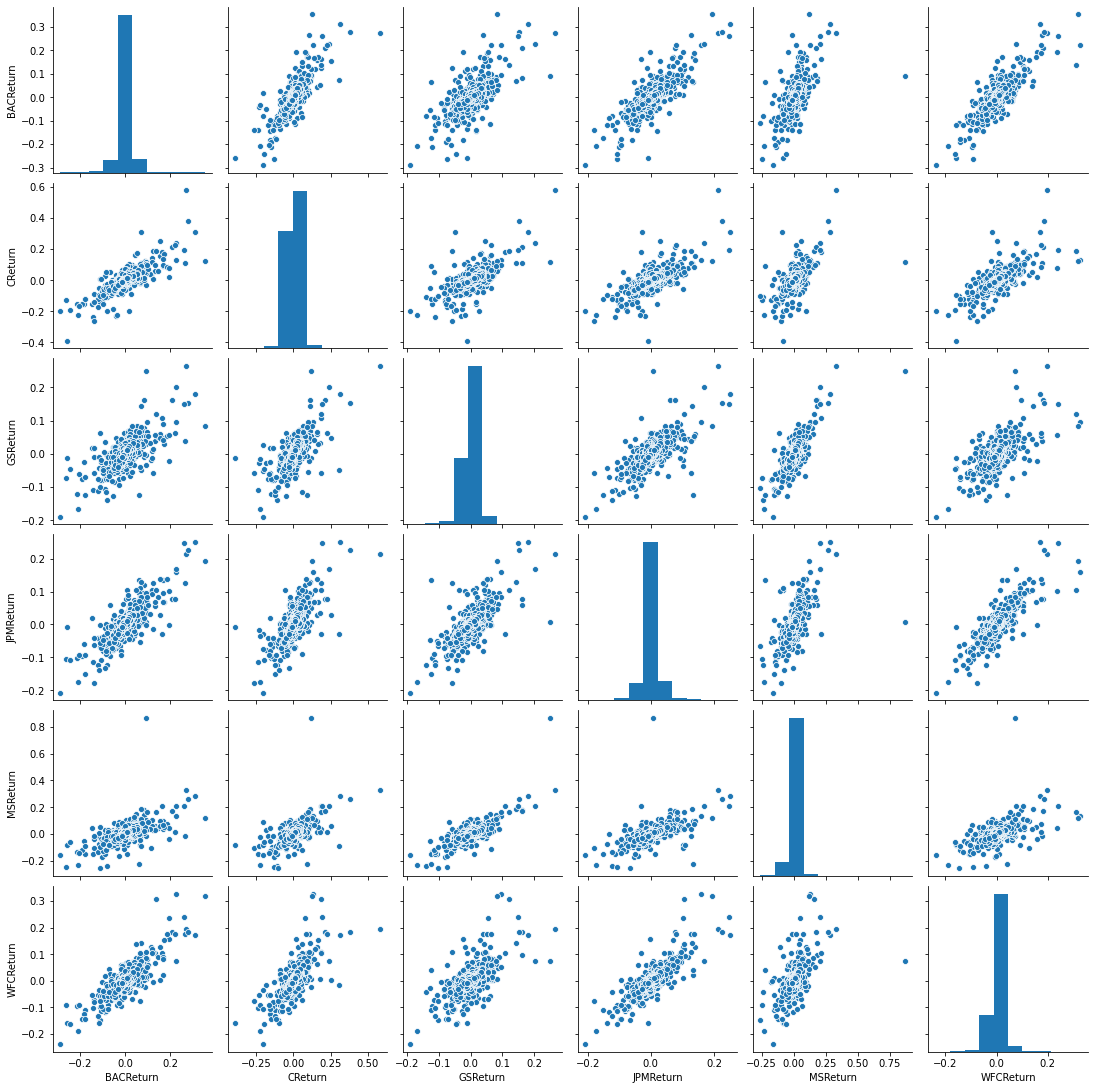

In [22]:
returns[1:];
sns.pairplot(returns[1:])

**Usando o DataFrame returns, podemos descubrir quais datas cada ação dos bancos teve o melhor e o pior dia de retorno.**

In [23]:
returns.head()

,BACReturn,CReturn,GSReturn,JPMReturn,MSReturn,WFCReturn
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


In [24]:
returns.idxmin() #piores retornos. para saber o que aconteceu, basta dar um google nas datas em comum

BACReturn   2009-01-20
CReturn     2009-02-27
GSReturn    2009-01-20
JPMReturn   2009-01-20
MSReturn    2008-10-09
WFCReturn   2009-01-20
dtype: datetime64[ns]

In [25]:
#para cada banco o mínimo retorno é obtido por
returns['BACReturn'].min()

-0.2896935896149381

In [26]:
returns.idxmax() 

BACReturn   2009-04-09
CReturn     2008-11-24
GSReturn    2008-11-24
JPMReturn   2009-01-21
MSReturn    2008-10-13
WFCReturn   2008-07-16
dtype: datetime64[ns]

In [27]:
#para cada banco o máximo retorno é obtido por
returns['BACReturn'].max()

0.35269125610998264

**Verificando o desvio padrão dos retornos.**

In [28]:
#de todo período
returns.std()

BACReturn    0.036647
CReturn      0.038672
GSReturn     0.025390
JPMReturn    0.027667
MSReturn     0.037819
WFCReturn    0.030238
dtype: float64

In [29]:
#quanto maior o desvio padrão (variação do retorno) mais volatilidade tem o ativo
returns.std().max()

0.03867175165181401

In [30]:
#do periodo de 2015
returns.index[0]

Timestamp('2006-01-03 00:00:00')

In [31]:
#os retornos para 2015 serão
returns[(returns.index.date >= datetime.date(2015, 1, 1)) & (returns.index.date < datetime.date(2016, 1, 1))].head()

,BACReturn,CReturn,GSReturn,JPMReturn,MSReturn,WFCReturn
2015-01-02,0.000559,0.002772,0.002992,-0.001438,-0.002320,-0.002189
2015-01-05,-0.029050,-0.031515,-0.031223,-0.031045,-0.031258,-0.027422
2015-01-06,-0.029919,-0.035205,-0.020229,-0.025929,-0.028800,-0.020865
2015-01-07,0.004745,0.009270,0.014903,0.001526,0.014278,0.005951
2015-01-08,0.020661,0.015048,0.015965,0.022346,0.014889,0.022137


**Criando um distplot usando seaborn dos retornos de 2015 para Morgan Stanley**

<AxesSubplot:xlabel='MSReturn'>

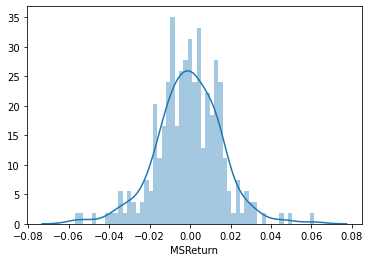

In [34]:
sns.distplot(returns[(returns.index.date >= datetime.date(2015, 1, 1)) & 
                     (returns.index.date < datetime.date(2016, 1, 1))]['MSReturn'],bins=55)

**Criando um distplot usando seaborn dos retornos de 2008 para CitiGroup**

<AxesSubplot:xlabel='CReturn'>

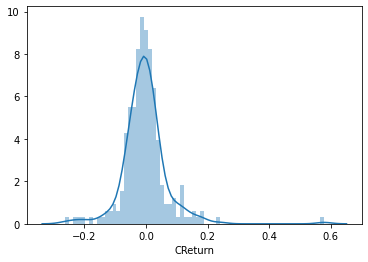

In [35]:
sns.distplot(returns[(returns.index.date >= datetime.date(2008, 1, 1)) & (returns.index.date < datetime.date(2009, 1, 1))]['CReturn'],bins=65)

# Mais visualização


### Importações

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

**Criando um gráfico de linha mostrando o preço de fechamento para cada banco para todo o índice de tempo.**

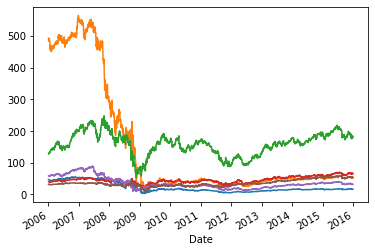

In [36]:
#usando loop for
for tick in tickers:
    bank_stocks[tick]['Close'].plot()

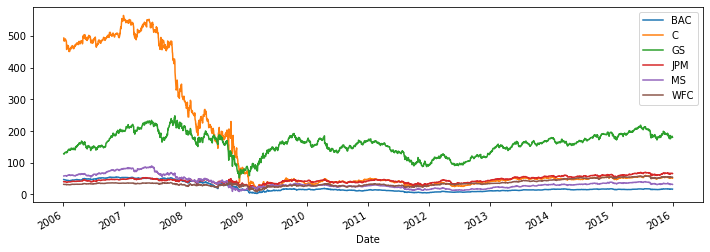

In [40]:
#ou tb
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,4), label=tick)
plt.legend(loc=1)

<AxesSubplot:xlabel='Date'>

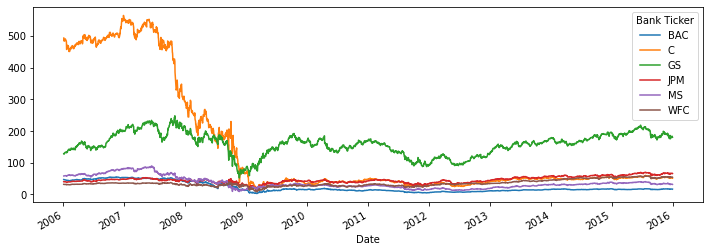

In [41]:
#ou usando a função xs()
bank_stocks.xs('Close',axis=1,level='Stock Info').plot(figsize=(12,4))

## Médias móveis

Vamos analisar as médias móveis para essas ações no ano de 2008.

**Traçando a média de 30 dias para o preço próximo do Bank Of America para o ano de 2008**

<AxesSubplot:xlabel='Date'>

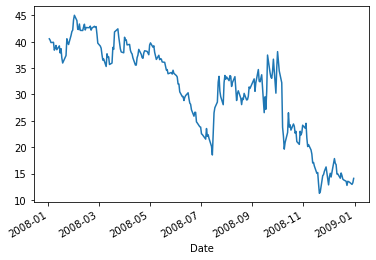

In [43]:
BAC[(BAC.index.date >= datetime.date(2008, 1, 1)) & (BAC.index.date < datetime.date(2009, 1, 1))]['Close'].plot()

<AxesSubplot:xlabel='Date'>

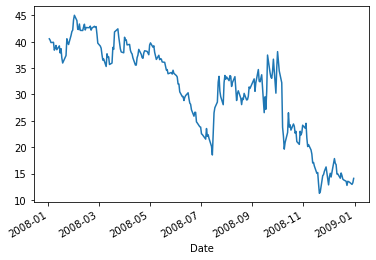

In [44]:
#outro método para fazer a seleção anterior
BAC['Close'][BAC.index.year==2008];
BAC['Close'][BAC.index.year==2008].plot()

<AxesSubplot:xlabel='Date'>

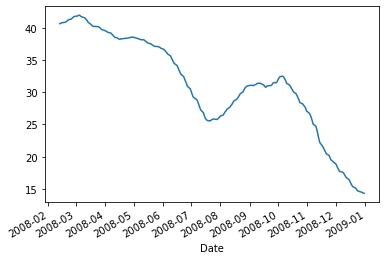

In [45]:
#para calcular a média móvel
BAC['Close'][BAC.index.year==2008].rolling(window=30).mean().head(31);
BAC['Close'][BAC.index.year==2008].rolling(window=30).mean().plot()

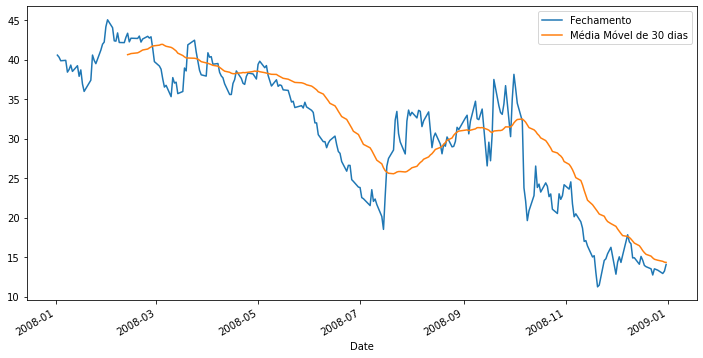

In [46]:
#plotando os dois juntos
BAC['Close'][BAC.index.year==2008].plot(figsize=(12,6),label='Fechamento')
BAC['Close'][BAC.index.year==2008].rolling(window=30).mean().plot(label='Média Móvel de 30 dias')
plt.legend()

**Criando um mapa de calor da correlação entre os preços de fechamento das ações.**

In [47]:
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   34.811729  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   34.442013  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   34.486385  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   34.434616  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   34.456806  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  36.867344  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  36.892612  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  36.993786  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  37.031731  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  37.423725  31.825001  31.555000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  20.723480  
2006-01-04   31.799999  31.530001  10870000.0  20.483118  
2006-01-05   31.500000  31.495001  10158000.0  20.460379  
2006-01-06   31.580000  31.680000   8403800.0  20.580564  
2006-01-09   31.674999  31.674999   5619600.0  20.577309  

[5 rows x 36 columns]

In [48]:
#aqui vamos ter que usar o comando .xs devido o dataframe ter subníveis
bank_stocks.xs(key='Close',level='Stock Info',axis=1).head()

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Date,,,,,,
2006-01-03,47.080002,492.899994,128.869995,40.189999,58.310001,31.900000
2006-01-04,46.580002,483.799988,127.089996,39.619999,58.349998,31.530001
2006-01-05,46.639999,486.200012,127.040001,39.740002,58.509998,31.495001
2006-01-06,46.570000,486.200012,128.839996,40.020000,58.570000,31.680000
2006-01-09,46.599998,483.899994,130.389999,40.669998,59.189999,31.674999


In [49]:
#correlação
corr_close = bank_stocks.xs(key='Close',level='Stock Info',axis=1).corr()

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

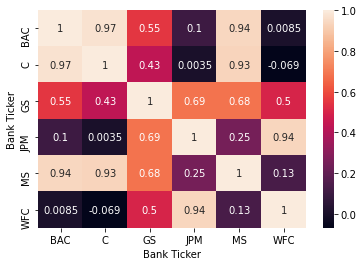

In [50]:
sns.heatmap(corr_close,annot=True)

**Usanod o clustermap do seaborn para agrupar as correlações:**

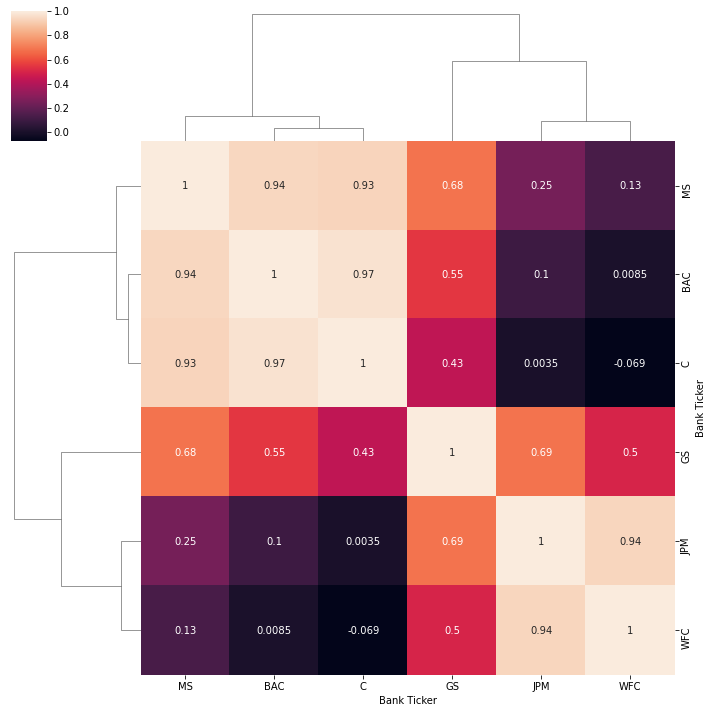

In [51]:
sns.clustermap(corr_close,annot=True)